## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 18
---------------------------------------

GOALS:

1. Practice Logistic Regression
2. Interpret Logistic Regression Results

----------------------------------------------------------


This homework has **1 Exercise** and **1 Challenge Exercise**

### Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


### Announcements

**Come to Lab!** If you need help we are here to help!

### Day 18 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day18 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day18-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import metrics

### Data: A collection of Emails

- Emails for the first three months of 2012 for an email account
- Data from 3921 emails and 21 variables on them
- Outcome: whether the email is spam or not
- Predictors: number of characters, whether the email had "Re:" in the subject, time at which email was sent, number of times the word "inherit" shows up in the email, etc.


Data Information: https://www.openintro.org/data/index.php?data=email

This lab follows the Data Science in a Box units "Unit 4 - Deck 6: Logistic regression" by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [5]:
file_name = 'data/email.csv'
DF = pd.read_csv(file_name)

In [6]:
DF

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01T09:09:49Z,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01T10:00:01Z,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,0,1,0,0,2012-03-31T00:03:45Z,0,0,0,no,...,0,0,0.332,12,0,0,0,0,0,small
3917,1,0,1,0,0,2012-03-31T14:13:19Z,0,0,1,no,...,0,0,0.323,15,0,0,0,0,0,small
3918,0,1,1,0,0,2012-03-30T16:20:33Z,0,0,0,no,...,0,0,8.656,208,1,0,0,0,5,small
3919,0,1,1,0,0,2012-03-28T16:00:49Z,0,0,0,no,...,0,0,10.185,132,0,0,0,0,0,small


**Exercise 1** Logistic Regression with ONE explanatory variable.

Choose another variable from the data set to use as your explanatory variable and create a Logistic Regression model to predict if an email is spam or not. You should do all of the following:

1. Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). Why do you think this is a good variable to use in predicting if an email is spam.
2. Create and fit a Logistic Regression model.
3. Show the results: intercept, coefficient, basic confusion matrix prediction.
4. What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.
5. Explain your results in words. You should talk about False Negative and False positive rates and what they mean in terms of the variables you chose.


**Exercise 2 - challenge** Logistic Regression with MORE THAN ONE explanatory variable.

Try redoing the analysis, but this time add a few more explanatory variables. Again do some analysis of the variables you are chosing and state why they are a good choice. Then answer again questions 1-5.

In [8]:
DF[['exclaim_mess','spam']].groupby('spam').describe()

exclaim_mess                                                 
            count      mean        std  min  25%  50%  75%     max
spam                                                              
0          3554.0  6.508160  47.609681  0.0  0.0  1.0  5.0  1236.0
1           367.0  7.321526  79.872748  0.0  0.0  0.0  1.0  1209.0

In [10]:
# Get a subset of the rows
DF['exclaim_mess_factor'] = DF['exclaim_mess'] / 100

DF_model = DF[['exclaim_mess','spam','exclaim_mess_factor']]

# Get the variables
X = DF_model['exclaim_mess_factor'].values.reshape(-1,1)
y = DF_model['spam']

# Do the regression
LM = LogisticRegression()
LM.fit(X,y)

print('Classes:')
print(LM.classes_)
print('Coefficients:')
print(LM.coef_)
print('Intercept:')
print(LM.intercept_)

Classes:
[0 1]
Coefficients:
[[0.02629194]]
Intercept:
[-2.27300613]


In [20]:
num = 10
intercept = -2.28
slope = 0.0263

eta = intercept + slope*num

P = np.exp(eta)/(1+np.exp(eta))
print(P)

0.11742955376731437


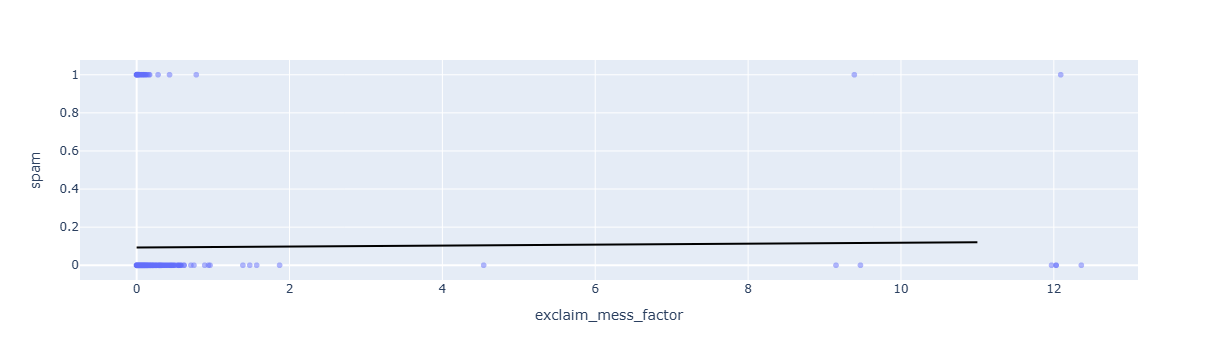

In [26]:
intercept = -2.28
slope = 0.0263

P = []

num_characters = list(np.arange(0,12,1))

for num in num_characters:
    eta = intercept + slope*num
    P.append(np.exp(eta)/(1+np.exp(eta)))


# Plot the results
fig = px.scatter(DF_model,x='exclaim_mess_factor',y='spam',opacity=.5)

fig.add_trace(
    px.line(x=num_characters,y=P,color_discrete_sequence=['black']).data[0]
)

fig.show()

In [28]:
# import the metrics class
from sklearn import metrics

DF_model['prediction'] = LM.predict(X)

y_pred = DF_model['prediction'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3554,    0],
       [ 367,    0]], dtype=int64)

In [30]:
TP = cnf_matrix[0,0] # The email was not spam and was correctly labeled 0
FP = cnf_matrix[0,1] # The email was spam and was incorrectly labeled as 0
FN = cnf_matrix[1,0] # The email was not spam at was incorrectly labeled 1
TN = cnf_matrix[1,1] # The email was spam and was correctly labeled 1

In [32]:
# Create new columns in your data frame
DF_model[['prob not spam','prob spam']] = LM.predict_proba(X)

In [34]:
# Look at the model DF
DF_model

,exclaim_mess,spam,exclaim_mess_factor,prediction,prob not spam,prob spam
0,0,0,0.00,0,0.906617,0.093383
1,1,0,0.01,0,0.906594,0.093406
2,6,0,0.06,0,0.906483,0.093517
3,48,0,0.48,0,0.905543,0.094457
4,1,0,0.01,0,0.906594,0.093406
...,...,...,...,...,...,...
3916,0,1,0.00,0,0.906617,0.093383
3917,0,1,0.00,0,0.906617,0.093383
3918,5,0,0.05,0,0.906505,0.093495
3919,0,0,0.00,0,0.906617,0.093383


In [36]:
# Choose your cutoff

cutoff = .1 #if prob spam is 5% or higher it is labeled spam

# Use a lambda on the new columns to create your new prediction
DF_model['new_prediction'] = DF_model['prob spam'].apply(lambda x: 1 if x>cutoff else 0)

# Look at the model DF
DF_model

,exclaim_mess,spam,exclaim_mess_factor,prediction,prob not spam,prob spam,new_prediction
0,0,0,0.00,0,0.906617,0.093383,0
1,1,0,0.01,0,0.906594,0.093406,0
2,6,0,0.06,0,0.906483,0.093517,0
3,48,0,0.48,0,0.905543,0.094457,0
4,1,0,0.01,0,0.906594,0.093406,0
...,...,...,...,...,...,...,...
3916,0,1,0.00,0,0.906617,0.093383,0
3917,0,1,0.00,0,0.906617,0.093383,0
3918,5,0,0.05,0,0.906505,0.093495,0
3919,0,0,0.00,0,0.906617,0.093383,0


In [38]:
# Redo the confusion matrix

y_pred = DF_model['new_prediction'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3547,    7],
       [ 365,    2]], dtype=int64)

In [40]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TN = cnf_matrix[1,1]

print('False Negative Rate:')
print(FN/ (TP+FN))
print('------')
print('False Positive Rate:')
print(FP/ (FP+TN))
print('------')
print('Sensitivity:')
print(1 - (FN/ (TP+FN)))
print('------')
print('Specificity:')
print(1- (FP/ (FP+TN)))

False Negative Rate:
0.09330265848670756
------
False Positive Rate:
0.7777777777777778
------
Sensitivity:
0.9066973415132924
------
Specificity:
0.2222222222222222


### 1. The use of the variable exclaim_mess showed in its statistics that theres was some variation in its spam and not spam. Gave us a number of 7.32 for spam and 6.50 for not spam showing there could be some correlation between them. From my experince at times using exclimation marks are used to grab attention for people to open the email. 

### 2. For the logistics regression model we had an intercept of -2.28. In regards for it being a spam it means at lower number of exclimation points means its less likely to be a spam. The coefficent was a .026 after I had changed the factor down by 100. It demonstrated to me that there are low chances of it being a spam. 

### 3. The first one came with 3554 as True negative and 367 and false negative. Our bigger number did get classified as non spam and 367 got incorrectly classified as non spam. 

### 4. I adjusted the cutoff to .1, which adjusted the matrix to its current state. It didn't really change it much in the sense that it now has 7 false positives and 2 true positives. Changing it did help  identifying those falsely flagged  non spam but it wouldn't be ideal. 

#### Results wise I would say the exlimation doesn't help as a big indicator if it is a spam. I would say that its best to be used along side another variable that has a better correlation in detecting spam properly. There was a high false postive of 77 percent which I say is very unideal as it could detect our non spam as spam. Even thought about 10 percent of span was missed. I say its a very high range of emails that will be missed out. 